In [33]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Arial', size=10)
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from scipy.stats import pearsonr

# Import local modules
import datasets

In [34]:
# Read in the dataset
X, Y = datasets.read_highweh_grid()
#X = datasets.normalize_counts(X)
X = np.take(X, range(64), axis=1)
# X = datasets.divide_wgt(X)
#X = np.take(X, range(17, 34), axis=1)
X.shape

(2133, 64)

In [35]:
# Center the data 
# X_mu = np.mean(X, axis=0)
# X = X - X_mu

In [36]:
# bnacs = Y[np.where(Y[:,0] == 0.1)]
# bnacs = sorted(bnacs[:,1])
# steps = [bnacs[i+1]-bnacs[i] for i in range(len(bnacs)-1)]
# print steps

In [37]:
bins = np.take(datasets.time_bins_dan, range(17,34))
med_width = np.median([bins[i+1]-bins[i] for i in range(len(bins)-1)])
min_width = np.min([bins[i+1]-bins[i] for i in range(len(bins)-1)])
print bins
print med_width
print min_width

[ 249.438  285.125  325.25   370.375  421.125  478.188  542.375  614.562
  695.75   787.062  889.75  1005.25  1135.19  1281.31  1445.69  1630.56
 1838.5  ]
86.25
35.68700000000001


In [38]:
# Do PCA and transform data
pca = PCA(n_components=2)
X_t = pca.fit_transform(X)
X_t.shape
print pca.explained_variance_ratio_

[0.93446578 0.05803919]


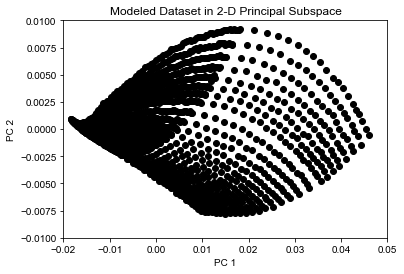

In [39]:
plt.scatter(X_t[:,0], X_t[:,1], color='k')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.ylim(-0.01, 0.01)
plt.xlim(-0.02,0.05)
plt.gcf().subplots_adjust(left=0.15)

plt.title('Modeled Dataset in 2-D Principal Subspace')
plt.savefig('/Users/hannahrae/Documents/Grad School/DAN Manuscript/figures/modeled_manifold.pdf')

In [40]:
# Load the DAN data for later comparison
X_dan, Y_dan, Y_err, names_dan = datasets.read_dan_data()
#X_dan = datasets.normalize_counts(X_dan)
X_dan = np.take(X_dan, range(64), axis=1)
#X_dan = np.take(X_dan, range(17, 34), axis=1)

X_dan_t = pca.transform(X_dan)

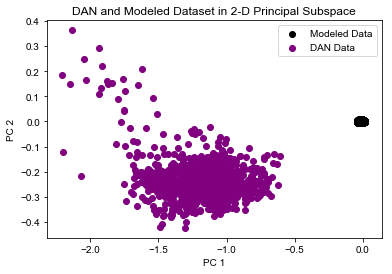

In [41]:
plt.scatter(-X_t[:,0], X_t[:,1], color='k', label='Modeled Data')
plt.scatter(-X_dan_t[:,0], X_dan_t[:,1], color='purple', label='DAN Data')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
# plt.ylim(-0.01, 0.01)
# plt.xlim(-0.02,0.05)
plt.legend()
plt.title('DAN and Modeled Dataset in 2-D Principal Subspace')
plt.savefig('/Users/hannahrae/Documents/Grad School/DAN Manuscript/figures/dan_modeled_manifold.pdf')

1538.125


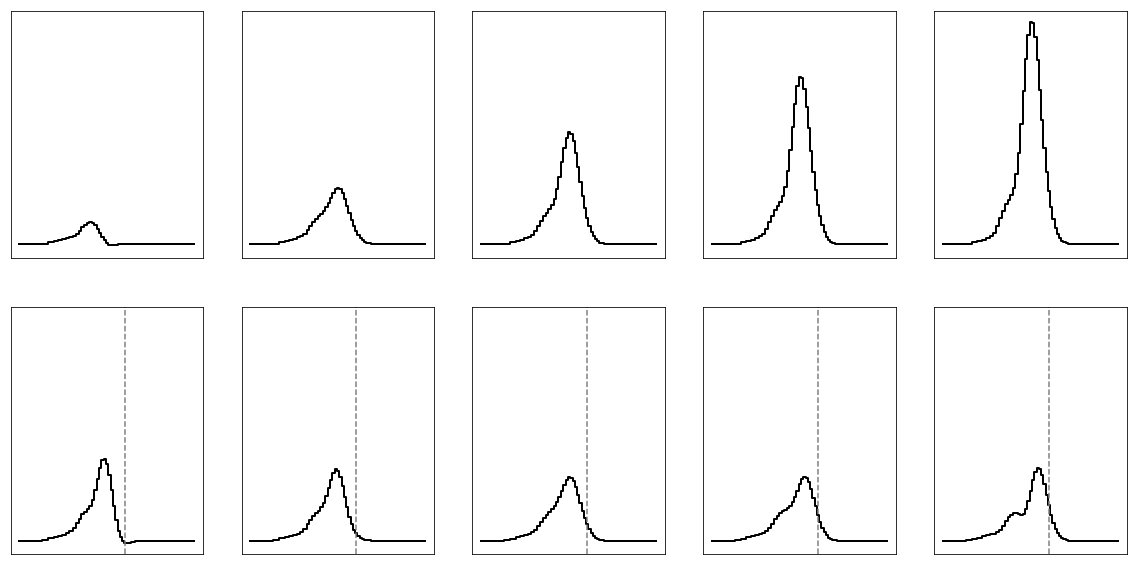

In [42]:
# Plot the reconstructed curves along each axis
pc1_min = np.min(X_t[:,0])
pc1_max = np.max(X_t[:,0])
pc2_min = np.min(X_t[:,1])
pc2_max = np.max(X_t[:,1])
pc1_pts = np.linspace(pc1_min, pc1_max, 5)
pc2_pts = np.linspace(pc2_min, pc2_max, 5)

print np.median(datasets.time_bins_dan[:-1])

fig2, axes = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(20,10))

for j, p in enumerate(pc1_pts):
    inv = pca.inverse_transform([p, 0])
    axes[0,j].step(datasets.time_bins_dan[:-1], inv[:64], where='post', linewidth=2, color='k')
    axes[0,j].set_xscale('log')
    axes[0,j].tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left=False,      # ticks along the bottom edge are off
        right=False,         # ticks along the top edge are off
        labelleft=False,
        labelbottom=False) # labels along the bottom edge are off

for j, p in enumerate(pc2_pts):
    inv = pca.inverse_transform([0, p])
    axes[1,j].step(datasets.time_bins_dan[:-1], inv[:64], where='post', linewidth=2, color='k')
    axes[1,j].axvline(np.median(datasets.time_bins_dan[:-1]), color='grey', linestyle='--')
    axes[1,j].set_xscale('log')
    axes[1,j].tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left=False,      # ticks along the bottom edge are off
        right=False,         # ticks along the top edge are off
        labelleft=False,
        labelbottom=False) # labels along the bottom edge are off

plt.savefig('/Users/hannahrae/Documents/Grad School/DAN Manuscript/figures/traverse_components_thermal.pdf', transparent=True)
    
# fig2, axes = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(20,10))

# for j, p in enumerate(pc1_pts):
#     inv = pca.inverse_transform([p, 0])
#     axes[0,j].step(datasets.time_bins_dan[:-1], inv[64:], where='post', linewidth=2, color='k')
#     axes[0,j].set_xscale('log')
#     axes[0,j].tick_params(
#         axis='both',          # changes apply to the x-axis
#         which='both',      # both major and minor ticks are affected
#         bottom=False,      # ticks along the bottom edge are off
#         top=False,         # ticks along the top edge are off
#         left=False,      # ticks along the bottom edge are off
#         right=False,         # ticks along the top edge are off
#         labelleft=False,
#         labelbottom=False) # labels along the bottom edge are off

# for j, p in enumerate(pc2_pts):
#     inv = pca.inverse_transform([0, p])
#     axes[1,j].step(datasets.time_bins_dan[:-1], inv[64:], where='post', linewidth=2, color='k')
#     axes[1,j].set_xscale('log')
#     axes[1,j].tick_params(
#         axis='both',          # changes apply to the x-axis
#         which='both',      # both major and minor ticks are affected
#         bottom=False,      # ticks along the bottom edge are off
#         top=False,         # ticks along the top edge are off
#         left=False,      # ticks along the bottom edge are off
#         right=False,         # ticks along the top edge are off
#         labelleft=False,
#         labelbottom=False) # labels along the bottom edge are off
    
# plt.savefig('/Users/hannahrae/Documents/Grad School/DAN Manuscript/figures/traverse_components_epithermal.pdf', transparent=True)


In [43]:
# Compute the peak height for each model measurement
# peak_height = np.max(X, axis=1)

# Compute the total counts for each model measurement
total_counts = np.sum(X, axis=1)
total_counts.shape

(2133,)

Correlation between total flux and WEH: 0.7896333265758633
[0.26, 0.3, 0.35, 0.39, 0.44, 0.49, 0.53, 0.58, 0.63, 0.68, 0.73, 0.78, 0.83, 0.88, 0.93, 0.98, 1.03, 1.08, 1.13, 1.18, 1.23, 1.28, 1.33, 1.38, 1.43, 1.48, 1.53]
0.03378778157566945
0.02271579403101369


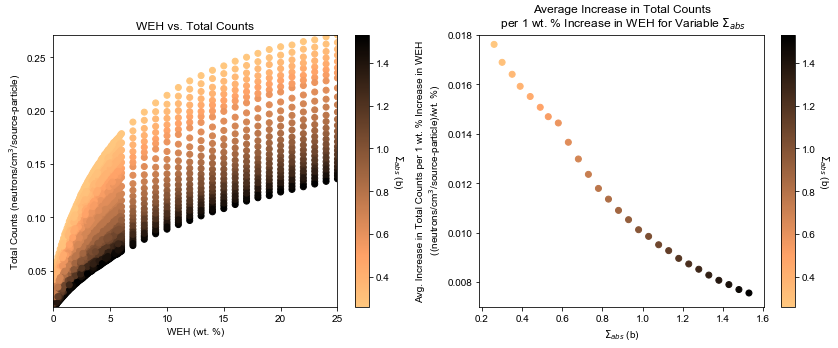

In [11]:
# Plot correlation between WEH and Total Flux
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(14,5))
p = ax.scatter(Y[:,0], total_counts, c=Y[:,1], cmap='copper_r')
cbar = fig.colorbar(p, ax=ax)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel("$\Sigma_{abs}$ (b)", rotation=270)
ax.set_ylabel('Total Counts (neutrons/cm$^3$/source-particle)')
ax.set_xlabel('WEH (wt. %)')
ax.set_ylim(np.min(total_counts), np.max(total_counts))
ax.set_xlim(0, np.max(Y[:,0]))
ax.set_title('WEH vs. Total Counts')
print "Correlation between total flux and WEH:", pearsonr(total_counts, Y[:,0])[0]

slopes = []
for i in sorted(list(set(Y[:,1]))):
    inds = np.where(Y[:,1] == i)
    sub_counts = total_counts[inds]
    weh = Y[:,0][inds]
    # Sort the counts by WEH content
    weh, sub_counts = zip(*sorted(zip(weh, sub_counts)))
    _s = [(sub_counts[j+1]-sub_counts[j])/(weh[j+1]-weh[j]) for j in range(len(weh)-1)]
    s = np.mean(_s)
    #s = (sub_counts[-1] - sub_counts[0]) / 24.9
    slopes.append(s)


print sorted(list(set(Y[:,1])))
p2 = ax2.scatter(sorted(list(set(Y[:,1]))), slopes, c=sorted(list(set(Y[:,1]))), cmap='copper_r')
cbar = fig.colorbar(p2, ax=ax2)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel("$\Sigma_{abs}$ (b)", rotation=270)
ax2.set_ylabel("Avg. Increase in Total Counts per 1 wt. % Increase in WEH\n ((neutrons/cm$^3$/source-particle)/wt. %)")
ax2.set_xlabel("$\Sigma_{abs}$ (b)")
ax2.set_title("Average Increase in Total Counts\n per 1 wt. % Increase in WEH for Variable $\Sigma_{abs}$")
ax2.set_ylim(0.007, 0.018)

print slopes[1] * 2.0
print slopes[12] * 2.0

# # Plot the total counts with error bars for three measurements
# bnacs = sorted(list(set(Y[:,1])))
# _bnacs = [bnacs[0], bnacs[13], bnacs[-1]]
# print _bnacs
# sub_counts = np.ndarray([len(_bnacs), 79])
# error_counts = np.ndarray([len(_bnacs), 79])
# sub_bnacs = np.ndarray([len(_bnacs), 79])
# sub_weh = np.ndarray([len(_bnacs), 79])
# for i, b in enumerate(_bnacs):
#     inds = np.where(Y[:,1] == b)
#     sub_bnacs[i] = Y[:,1][inds]
#     sub_weh[i] = Y[:,0][inds]
#     sub_counts[i] = total_counts[inds]
#     error_counts[i] = np.sqrt(total_counts[inds])

# p2 = ax2.scatter(sub_weh, sub_counts, c=sub_bnacs, cmap='copper_r')
# for i in range(3):
#     ax2.errorbar(sub_weh[i], sub_counts[i], yerr=error_counts[i], color='k', elinewidth=0.5, linestyle="None")
#     plt.axhline(sub_counts[i][np.where(sub_weh[i] == 1.0)])
# cbar = fig.colorbar(p2, ax=ax2)
# cbar.ax.get_yaxis().labelpad = 15
# cbar.ax.set_ylabel("$\Sigma_{abs}$ (barns)", rotation=270)
# ax2.set_xlim(1, 5)
# ax2.set_ylabel('Total Counts')
# ax2.set_xlabel('WEH (wt %)')
# ax2.set_title("WEH vs. Total Counts with Count Error for Min, Median, and Max $\Sigma_{abs}$ ")

plt.savefig('/Users/hannahrae/Documents/Grad School/DAN Manuscript/figures/weh_vs_counts_slope.pdf', transparent=True)

Correlation between total counts and BNACS: -0.52574989868981
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0]
-0.01919241777881364
-0.03272532264119466


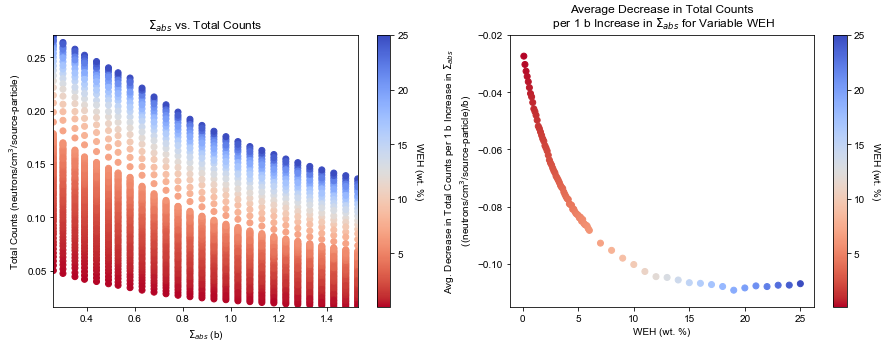

In [44]:
# Plot correlation between PC1 and peak height colored by BNACS
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(15,5))

p = ax.scatter(Y[:,1], total_counts, c=Y[:,0], cmap='coolwarm_r')
cbar = fig.colorbar(p, ax=ax)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel("WEH (wt. %)", rotation=270)
ax.set_ylabel('Total Counts (neutrons/cm$^3$/source-particle)')
ax.set_xlabel('$\Sigma_{abs}$ (b)')
ax.set_ylim(np.min(total_counts), np.max(total_counts))
ax.set_xlim(np.min(Y[:,1]), np.max(Y[:,1]))
ax.set_title('$\Sigma_{abs}$ vs. Total Counts')
print "Correlation between total counts and BNACS:", pearsonr(total_counts, Y[:,1])[0]

slopes = []
for i in sorted(list(set(Y[:,0]))):
    inds = np.where(Y[:,0] == i)
    sub_counts = total_counts[inds]
    bnacs = Y[:,1][inds]
    # Sort the counts by WEH content
    bnacs, sub_counts = zip(*sorted(zip(bnacs, sub_counts)))
    _s = [(sub_counts[j+1]-sub_counts[j])/(bnacs[j+1]-bnacs[j]) for j in range(len(bnacs)-1)]
    s = np.mean(_s)
    #s = np.abs(sub_counts[-1] - sub_counts[0]) / 24.9
    slopes.append(s)
p2 = ax2.scatter(sorted(list(set(Y[:,0]))), slopes, c=sorted(list(set(Y[:,0]))), cmap='coolwarm_r')
cbar = fig.colorbar(p2, ax=ax2)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel("WEH (wt. %)", rotation=270)
ax2.set_ylabel("Avg. Decrease in Total Counts per 1 b Increase in $\Sigma_{abs}$\n ((neutrons/cm$^3$/source-particle)/b)")
ax2.set_xlabel("WEH (wt. %)")
ax2.set_title("Average Decrease in Total Counts\n per 1 b Increase in $\Sigma_{abs}$ for Variable WEH")
ax2.set_ylim(-0.115, -0.02)


print sorted(list(set(Y[:,0])))
print slopes[5] * 0.5
print slopes[25] * 0.5

# # Plot the total counts with error bars for three measurements
# weh = sorted(list(set(Y[:,0])))
# print weh[0], weh[39], weh[-1]
# sub_counts = np.ndarray([3, 27])
# error_counts = np.ndarray([3, 27])
# sub_weh = np.ndarray([3, 27])
# sub_bnacs = np.ndarray([3, 27])
# for i, w in enumerate([weh[0], weh[39], weh[-1]]):
#     inds = np.where(Y[:,0] == w)
#     sub_weh[i] = Y[:,0][inds]
#     sub_bnacs[i] = Y[:,1][inds]
#     sub_counts[i] = total_counts[inds]
#     error_counts[i] = np.sqrt(total_counts[inds])

# p2 = ax2.scatter(sub_bnacs, sub_counts, c=sub_weh, cmap='coolwarm_r')
# for i in range(3):
#     ax2.errorbar(sub_bnacs[i], sub_counts[i], yerr=error_counts[i], color='k', elinewidth=0.5, linestyle="None")
# cbar = fig.colorbar(p2, ax=ax2)
# cbar.ax.get_yaxis().labelpad = 15
# cbar.ax.set_ylabel("WEH (wt %)", rotation=270)
# ax2.set_xlim(np.min(Y[:,1]), np.max(Y[:,1]))
# ax2.set_ylim(np.min(total_counts), np.max(total_counts))
# ax2.set_ylabel('Total Counts')
# ax2.set_xlabel('$\Sigma_{abs}$ (barns)')
# ax2.set_title("$\Sigma_{abs}$ vs. Total Counts with Count Error for Min, Median, and Max WEH")

plt.savefig('/Users/hannahrae/Documents/Grad School/DAN Manuscript/figures/abs_vs_counts_slope.pdf', transparent=True)

In [45]:
# Compute the flux-weighted time of arrival for each model measurement
def fwta(time_bins, counts):
    fwtas = np.ndarray(counts.shape[0])
    for i in range(counts.shape[0]):
        w_sum = 0
        for t in range(10, counts.shape[1]):
        #for t in range(counts.shape[1]):
            w_sum += time_bins[t] * counts[i,t]
        fwtas[i] = w_sum / float(np.sum(counts[i,:]))
    return fwtas
#arr_time = np.array(fwta(np.take(datasets.time_bins_dan[:-1], range(17,34)), X))
arr_time = np.array(fwta(datasets.time_bins_dan[:-1], X))
# arr_time_dan = fwta(datasets.time_bins_dan[:-1], X_dan)

Correlation between arrival time and WEH: 0.27322191096937637
[0.26, 0.3, 0.35, 0.39, 0.44, 0.49, 0.53, 0.58, 0.63, 0.68, 0.73, 0.78, 0.83, 0.88, 0.93, 0.98, 1.03, 1.08, 1.13, 1.18, 1.23, 1.28, 1.33, 1.38, 1.43, 1.48, 1.53]
18.676079434700245
41.49629400381789


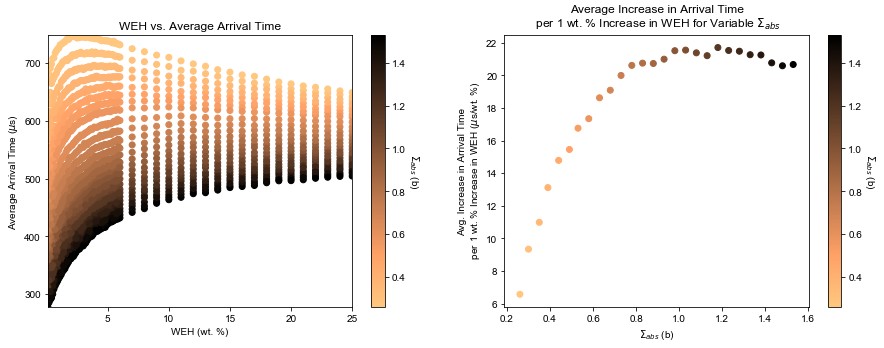

In [46]:
# Plot correlation between absorbers and Arrival Time
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(15,5))

p = ax.scatter(Y[:,0], arr_time, c=Y[:,1], cmap='copper_r')
cbar = fig.colorbar(p, ax=ax)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel("$\Sigma_{abs}$ (b)", rotation=270)
ax.set_ylabel('Average Arrival Time ($\mu$s)')
ax.set_xlabel('WEH (wt. %)')
ax.set_ylim(np.min(arr_time), np.max(arr_time))
ax.set_xlim(np.min(Y[:,0]), np.max(Y[:,0]))
ax.set_title('WEH vs. Average Arrival Time')
print "Correlation between arrival time and WEH:", pearsonr(arr_time, Y[:,0])[0]

slopes = []
for i in sorted(list(set(Y[:,1]))):
    inds = np.where(Y[:,1] == i)
    at = arr_time[inds]
    weh = Y[:,0][inds]
    # Sort the arrival times by WEH content
    weh, at = zip(*sorted(zip(weh, at)))
    _s = [(at[j+1]-at[j])/(weh[j+1]-weh[j]) for j in range(len(weh)-1)]
    s = np.mean(_s)
    #s = np.abs((at[-1]-at[0])/at[0])*100
    slopes.append(s)
p2 = ax2.scatter(sorted(list(set(Y[:,1]))), slopes, c=sorted(list(set(Y[:,1]))), cmap='copper_r')
cbar = fig.colorbar(p2, ax=ax2)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel("$\Sigma_{abs}$ (b)", rotation=270)
ax2.set_ylabel("Avg. Increase in Arrival Time\n per 1 wt. % Increase in WEH ($\mu$s/wt. %)")
ax2.set_xlabel("$\Sigma_{abs}$ (b)")
ax2.set_title("Average Increase in Arrival Time\n per 1 wt. % Increase in WEH for Variable $\Sigma_{abs}$")

print sorted(list(set(Y[:,1])))

print slopes[1] * 2.0
print slopes[12] * 2.0

plt.savefig('/Users/hannahrae/Documents/Grad School/DAN Manuscript/figures/weh_vs_arrtime.pdf', transparent=True)

(0.6, 0.35)
error 345.8777151148547
-0.1 577.9226509641449
+0.1 612.814110299747
-b 765.9532617643417
+b 572.9723305817606
(0.6, 1.43)
error 216.00617310675025
-0.1 297.28322512524755
+0.1 265.17646179719304
-b 104.8927837844094
+b 129.31740934013214
(5.2, 0.35)
error 543.2942882188515
-0.1 186.69090518070152
+0.1 280.94103261694545
-b 1356.1178694596165
+b 942.6311957868165
(5.2, 1.43)
error 357.29231168961525
-0.1 146.27677508365014
+0.1 166.57859530903806
-b 332.2576588014199
+b 322.84562148086843
(2.6, 0.83)
error 365.36064311623977
-0.1 254.0029634667444
+0.1 265.6120502341073
-b 670.4700492360862
+b 599.6682827502955


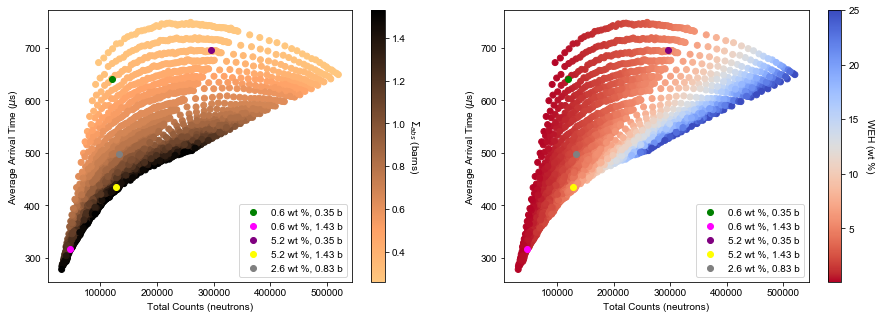

In [47]:
minutes = 20
pulses = minutes * 10 * 60
n_per_pulse = 1e7
sp = pulses * n_per_pulse
wgt = 5e6
vol = 80

fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(15,5))
p = ax.scatter(total_counts*vol*sp/wgt, arr_time, c=Y[:,1], cmap='copper_r')
cbar = fig.colorbar(p, ax=ax)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel("$\Sigma_{abs}$ (barns)", rotation=270)
ax.set_xlabel("Total Counts (neutrons)")
ax.set_ylabel("Average Arrival Time ($\mu$s)")

p2 = ax2.scatter(total_counts*vol*sp/wgt, arr_time, c=Y[:,0], cmap='coolwarm_r')
cbar = fig.colorbar(p2, ax=ax2)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel("WEH (wt %)", rotation=270)
ax2.set_xlabel("Total Counts (neutrons)")
ax2.set_ylabel("Average Arrival Time ($\mu$s)")

# Make a look up table of total counts and arrival time
params = {}
for i in range(X.shape[0]):
    params[(Y[i,0], Y[i,1])] = [total_counts[i]*vol*sp/wgt, arr_time[i]]

expanded_params = {}
num_subsamples = 11 # includes start and end points
sorted_keys = sorted(params.keys())
for i in range(len(params.keys())-1):
    sub_weh = np.linspace(start=sorted_keys[i][0], stop=sorted_keys[i+1][0], num=num_subsamples)
    sub_bnacs = np.linspace(start=sorted_keys[i][1], stop=sorted_keys[i+1][1], num=num_subsamples)
    sub_counts = np.linspace(start=params[sorted_keys[i]][0], stop=params[sorted_keys[i+1]][0], num=num_subsamples)
    sub_time = np.linspace(start=params[sorted_keys[i]][1], stop=params[sorted_keys[i+1]][1], num=num_subsamples)
    for j, (weh, bnacs) in enumerate(zip(sub_weh, sub_bnacs)):
        expanded_params[(np.around(weh, 4), np.around(bnacs, 4))] = [sub_counts[j], sub_time[j]]
        
sorted_keys = sorted(expanded_params.keys(), key=lambda x: (x[1], x[0]))
for i in range(len(expanded_params.keys())-1):
    sub_weh = np.linspace(start=sorted_keys[i][0], stop=sorted_keys[i+1][0], num=num_subsamples)
    sub_bnacs = np.linspace(start=sorted_keys[i][1], stop=sorted_keys[i+1][1], num=num_subsamples)
    sub_counts = np.linspace(start=expanded_params[sorted_keys[i]][0], stop=expanded_params[sorted_keys[i+1]][0], num=num_subsamples)
    sub_time = np.linspace(start=expanded_params[sorted_keys[i]][1], stop=expanded_params[sorted_keys[i+1]][1], num=num_subsamples)
    for j, (weh, bnacs) in enumerate(zip(sub_weh, sub_bnacs)):
        expanded_params[(np.around(weh, 2), np.around(bnacs, 4))] = [sub_counts[j], sub_time[j]]

#print sorted(expanded_params.keys())[:1000]
# sub_counts = [expanded_params[expanded_params.keys()[i]][0] for i in range(len(expanded_params.keys()))]
# sub_time = [expanded_params[expanded_params.keys()[i]][1] for i in range(len(expanded_params.keys()))]
# sub_weh = [expanded_params.keys()[i][0] for i in range(len(expanded_params.keys()))]
# sub_bnacs = [expanded_params.keys()[i][1] for i in range(len(expanded_params.keys()))]
# print set(sub_bnacs)

# ax2.scatter(sub_counts, sub_time, c=np.array(sub_weh), marker='.', cmap='coolwarm_r')


colors = ['green', 'magenta', 'purple', 'yellow', 'grey']
# Plot a couple of example DAN points
for i, tup in enumerate([(0.6, 0.35), (0.6, 1.43), (5.2, 0.35), (5.2, 1.43), (2.6, 0.83)]):
        print tup
        left = (np.around(tup[0]-0.01*1, 2), tup[1])
        right = (np.around(tup[0]+0.01*1, 2), tup[1])
        if tup[1] == 1.43 or tup[1] == 0.83:
            top = (tup[0], np.around(tup[1]-0.005*1, 4))
            bottom = (tup[0], np.around(tup[1]+0.005*1,4))
        elif tup[1] == 0.35:
            bottom = (tup[0], np.around(tup[1]+0.004*1+0.005*0, 4))
            top = (tup[0], np.around(tup[1]-0.005*1-0.004*0, 4))

        print 'error', np.sqrt(expanded_params[tup][0])
        print '-0.1', expanded_params[tup][0] - expanded_params[left][0]
        print '+0.1', expanded_params[right][0] - expanded_params[tup][0]
        print '-b', expanded_params[top][0] - expanded_params[tup][0]
        print '+b', expanded_params[tup][0] - expanded_params[bottom][0]

        # Plot the points on the grid
        ax.scatter(params[tup][0], params[tup][1], color=colors[i],  label='{} wt %, {} b'.format(tup[0], tup[1]))
        ax2.scatter(params[tup][0], params[tup][1], color=colors[i], label='{} wt %, {} b'.format(tup[0], tup[1]))
        ax.errorbar(params[tup][0], params[tup][1], xerr=np.sqrt(params[tup][0]), color=colors[i], linestyle="None")
        ax2.errorbar(params[tup][0], params[tup][1], xerr=np.sqrt(params[tup][0]), color=colors[i], linestyle="None")


# ax.set_xlim(140, 3300)
# ax2.set_xlim(140, 3300)
# ax.set_ylim(280, 760)
# ax2.set_ylim(280, 760)


ax.legend()
ax2.legend()

plt.savefig('/Users/hannahrae/Documents/Grad School/DAN Manuscript/figures/sensitivity.pdf', transparent=True)

Correlation between arrival time and BNACS: -0.8779529694754319
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0]
-161.7609488998675
-147.57836599163394


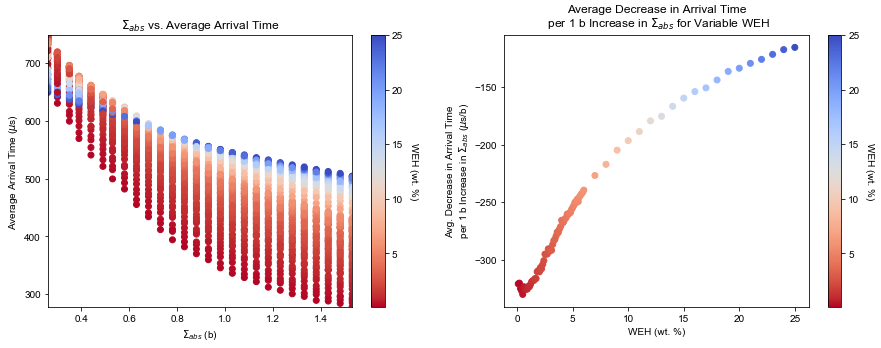

In [48]:
# Plot correlation between absorbers and FWTA
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(15,5))

p = ax.scatter(Y[:,1], arr_time, c=Y[:,0], cmap='coolwarm_r')
cbar = fig.colorbar(p, ax=ax)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel("WEH (wt. %)", rotation=270)
ax.set_ylabel('Average Arrival Time ($\mu$s)')
ax.set_xlabel('$\Sigma_{abs}$ (b)')
ax.set_ylim(np.min(arr_time), np.max(arr_time))
ax.set_xlim(np.min(Y[:,1]), np.max(Y[:,1]))
ax.set_title('$\Sigma_{abs}$ vs. Average Arrival Time')
print "Correlation between arrival time and BNACS:", pearsonr(arr_time, Y[:,1])[0]

slopes = []
for i in sorted(list(set(Y[:,0]))):
    inds = np.where(Y[:,0] == i)
    at = arr_time[inds]
    absorbers = Y[:,1][inds]
    # Sort the arrival times by absorber content
    absorbers, at = zip(*sorted(zip(absorbers, at)))
    _s = [(at[j+1]-at[j])/(absorbers[j+1]-absorbers[j]) for j in range(len(absorbers)-1)]
    s = np.mean(_s)
    slopes.append(s)
p2 = ax2.scatter(sorted(list(set(Y[:,0]))), slopes, c=sorted(list(set(Y[:,0]))), cmap='coolwarm_r')
cbar = fig.colorbar(p2, ax=ax2)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel("WEH (wt. %)", rotation=270)
ax2.set_ylabel("Avg. Decrease in Arrival Time\n per 1 b Increase in $\Sigma_{abs}$ ($\mu$s/b)")
ax2.set_xlabel("WEH (wt. %)")
ax2.set_title("Average Decrease in Arrival Time\n per 1 b Increase in $\Sigma_{abs}$ for Variable WEH")

print sorted(list(set(Y[:,0])))
print slopes[5] * 0.5
print slopes[25] * 0.5

plt.savefig('/Users/hannahrae/Documents/Grad School/DAN Manuscript/figures/abs_vs_arrtime.pdf', transparent=True)

(924, 64)


NameError: name 'peak_height' is not defined

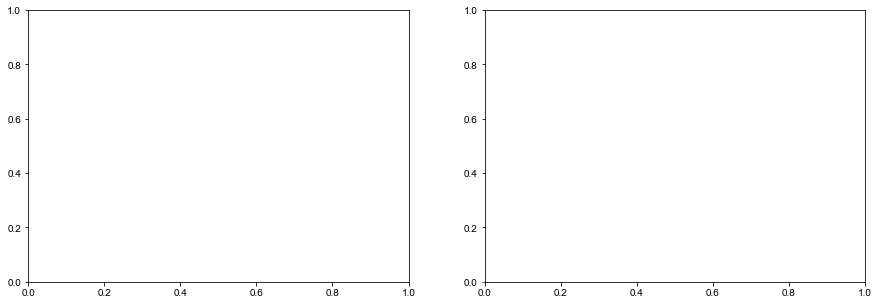

In [49]:
# Add DAN data to plots
X_dan, Y_dan, _, _ = datasets.read_dan_data(png_norm=True)
X_dan = datasets.normalize_counts(X_dan)
X_dan = np.take(X_dan, range(64), axis=1)
peak_height_dan = np.max(X_dan, axis=1)
X_dan_t = pca.transform(X_dan)
print X_dan.shape
# Plot correlation between PC1 and peak height colored by H
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(15,5))
p = ax.scatter(X_t[:,0], peak_height, c=Y[:,0])
# p = ax.scatter(X_dan_t[:,0], peak_height_dan, c=Y_dan[:,0])
ax.scatter(X_dan_t[:,0], peak_height_dan, color='red')
fig.colorbar(p, ax=ax)
ax.set_ylabel('Peak Height')
ax.set_xlabel('PC 1 Value')
ax.set_ylim(np.min(peak_height), np.max(peak_height))
ax.set_xlim(np.min(X_t[:,0]), np.max(X_t[:,0]))
ax.set_title('Correlation between Peak Height and PC 1, Colored by H Value')
p = ax2.scatter(Y[:,0], peak_height, c=Y[:,1])
#p = ax2.scatter(peak_height_dan, Y_dan[:,0], c=Y_dan[:,1])
ax2.scatter(Y_dan[:,0], peak_height_dan, color='red')
fig.colorbar(p, ax=ax2)
ax2.set_ylabel('Peak Height')
ax2.set_xlabel('WEH (wt %)')
ax2.set_ylim(np.min(peak_height), np.max(peak_height))
ax2.set_xlim(np.min(Y[:,0]), np.max(Y[:,0]))
ax2.set_title('Correlation between Peak Height and WEH')
plt.legend()

NameError: name 'peak_height' is not defined

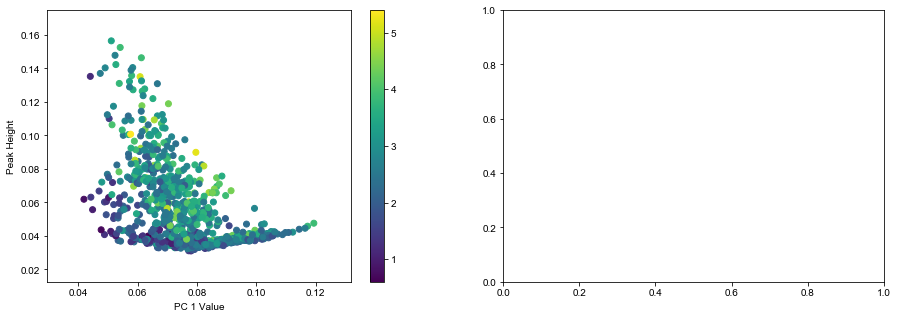

In [50]:
# Plot correlation between PC1 and peak height colored by H
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(15,5))
p = ax.scatter(X_dan_t[:,0], peak_height_dan, c=Y_dan[:,0])
fig.colorbar(p, ax=ax)
ax.set_ylabel('Peak Height')
ax.set_xlabel('PC 1 Value')
ax.set_ylim(np.min(peak_height), np.max(peak_height))
ax.set_xlim(np.min(X_t[:,0]), np.max(X_t[:,0]))
ax.set_title('Correlation between Peak Height and PC 1, Colored by H Value')
p = ax2.scatter(Y_dan[:,0], peak_height_dan, c=Y_dan[:,1])
fig.colorbar(p, ax=ax2)
ax2.set_ylabel('Peak Height')
ax2.set_xlabel('WEH (wt %)')
# ax2.set_ylim(np.min(peak_height), np.max(peak_height))
# ax2.set_xlim(np.min(Y[:,0]), np.max(Y[:,0]))
ax2.set_title('Correlation between Peak Height and WEH')
plt.legend()

NameError: name 'peak_height' is not defined

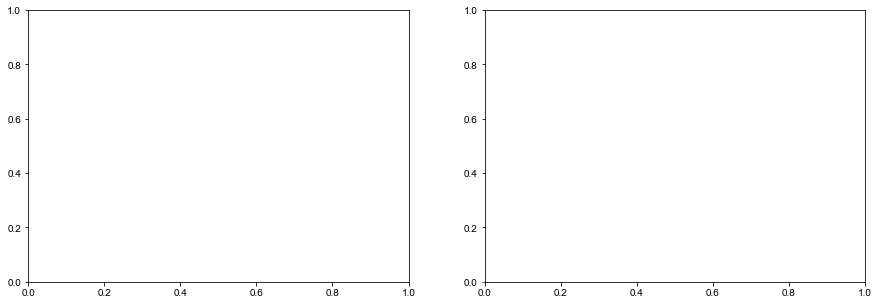

In [51]:
# Plot correlation between PC1 and peak height colored by BNACS
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(15,5))
p = ax.scatter(X_t[:,0], peak_height, c=Y[:,1])
#p = ax.scatter(X_dan_t[:,0], peak_height_dan, c=Y_dan[:,1])
ax.scatter(X_dan_t[:,0], peak_height_dan, color='red')
fig.colorbar(p, ax=ax)
ax.set_ylabel('Peak Height')
ax.set_xlabel('PC 1 Value')
ax.set_ylim(np.min(peak_height), np.max(peak_height))
ax.set_xlim(np.min(X_t[:,0]), np.max(X_t[:,0]))
ax.set_title('Correlation between Peak Height and PC 1, Colored by BNACS Value')
print "Correlation between PC1 and peak height:", pearsonr(X_t[:,0], peak_height)[0]
p = ax2.scatter(Y[:,1], peak_height, c=Y[:,0])
#p = ax2.scatter(peak_height_dan, Y_dan[:,1], c=Y_dan[:,0])
ax2.scatter(Y_dan[:,1], peak_height_dan, color='red')
fig.colorbar(p, ax=ax2)
ax2.set_ylabel('Peak Height')
ax2.set_xlabel('BNACS (b)')
ax2.set_ylim(np.min(peak_height), np.max(peak_height))
ax2.set_xlim(np.min(Y[:,1]), np.max(Y[:,1]))
ax2.set_title('Correlation between Peak Height and BNACS')
print "Correlation between peak height and WEH:", pearsonr(peak_height, Y[:,1])[0]

NameError: name 'peak_height' is not defined

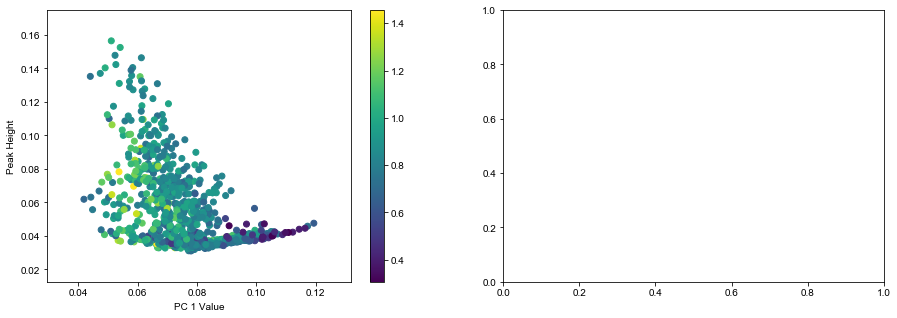

In [52]:
# Plot correlation between PC1 and peak height colored by BNACS
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(15,5))
p = ax.scatter(X_dan_t[:,0], peak_height_dan, c=Y_dan[:,1])
fig.colorbar(p, ax=ax)
ax.set_ylabel('Peak Height')
ax.set_xlabel('PC 1 Value')
ax.set_ylim(np.min(peak_height), np.max(peak_height))
ax.set_xlim(np.min(X_t[:,0]), np.max(X_t[:,0]))
ax.set_title('Correlation between Peak Height and PC 1, Colored by BNACS Value')
print "Correlation between PC1 and peak height:", pearsonr(X_t[:,0], peak_height)[0]
p = ax2.scatter(Y_dan[:,1], peak_height_dan, c=Y_dan[:,0])
fig.colorbar(p, ax=ax2)
ax2.set_ylabel('Peak Height')
ax2.set_xlabel('BNACS (b)')
ax2.set_ylim(np.min(peak_height), np.max(peak_height))
ax2.set_xlim(np.min(Y[:,1]), np.max(Y[:,1]))
ax2.set_title('Correlation between Peak Height and BNACS')
print "Correlation between peak height and WEH:", pearsonr(peak_height, Y[:,1])[0]

0.9978701638830568
0.5365718163972221


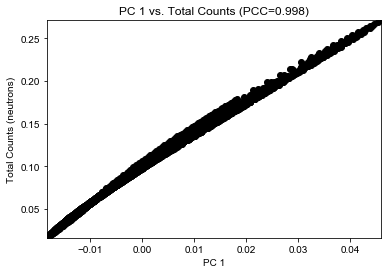

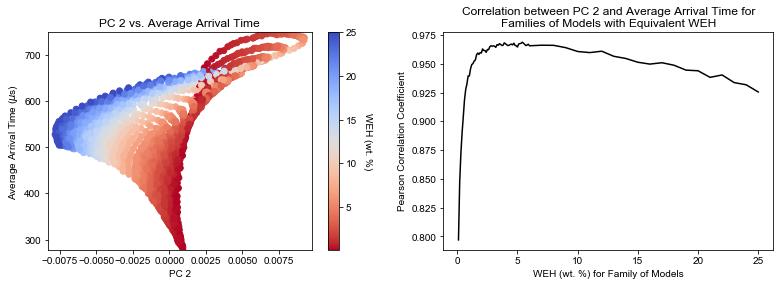

In [88]:
# Plot correlation between PCs and Total Counts/Arrival Time
fig, ax = plt.subplots(1)

ax.scatter(X_t[:,0], total_counts, color='k')
ax.set_xlim(np.min(X_t[:,0]), np.max(X_t[:,0]))
ax.set_ylim(np.min(total_counts), np.max(total_counts))
ax.set_xlabel('PC 1')
ax.set_ylabel('Total Counts (neutrons)')
ax.set_title('PC 1 vs. Total Counts (PCC=0.998)')

print pearsonr(total_counts, X_t[:,0])[0]

plt.savefig('/Users/hannahrae/Documents/Grad School/DAN Manuscript/figures/pc1_correlation.pdf', transparent=True)

fig, (ax2, ax3) = plt.subplots(ncols=2, figsize=(13,4))

p = ax2.scatter(X_t[:,1], arr_time, c=Y[:,0], cmap='coolwarm_r')
cbar = fig.colorbar(p, ax=ax2)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel("WEH (wt. %)", rotation=270)
ax2.set_xlim(np.min(X_t[:,1])-0.0005, np.max(X_t[:,1])+0.0005)
ax2.set_ylim(np.min(arr_time)-0.0005, np.max(arr_time)+0.0005)
ax2.set_xlabel('PC 2')
ax2.set_ylabel('Average Arrival Time ($\mu$s)')
ax2.set_title('PC 2 vs. Average Arrival Time')

hvals = sorted(list(set(Y[:,0])))
pcc = []
for h in hvals:
    fam = X_t[np.where(Y[:,0]==h)]
    fam_at = arr_time[np.where(Y[:,0]==h)]
    pcc.append(pearsonr(fam_at, fam[:,1])[0])

ax3.plot(hvals, pcc, color='k')
ax3.set_xlabel('WEH (wt. %) for Family of Models')
ax3.set_ylabel('Pearson Correlation Coefficient')
ax3.set_title("Correlation between PC 2 and Average Arrival Time for\nFamilies of Models with Equivalent WEH")
    
print pearsonr(arr_time, X_t[:,1])[0]

plt.savefig('/Users/hannahrae/Documents/Grad School/DAN Manuscript/figures/pc2_correlation.pdf', transparent=True)

Text(0.5,1,u'PC 2 vs. Absorber Content')

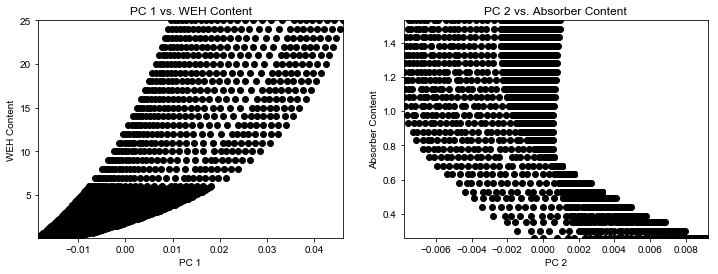

In [54]:
# Plot correlation between PCs and WEH/absorbers
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(12,4))

ax.scatter(X_t[:,0], Y[:,0], color='k')
ax.set_xlim(np.min(X_t[:,0]), np.max(X_t[:,0]))
ax.set_ylim(np.min(Y[:,0]), np.max(Y[:,0]))
ax.set_xlabel('PC 1')
ax.set_ylabel('WEH Content')
ax.set_title('PC 1 vs. WEH Content')

ax2.scatter(X_t[:,1], Y[:,1], color='k')
ax2.set_xlim(np.min(X_t[:,1]), np.max(X_t[:,1]))
ax2.set_ylim(np.min(Y[:,1]), np.max(Y[:,1]))
ax2.set_xlabel('PC 2')
ax2.set_ylabel('Absorber Content')
ax2.set_title('PC 2 vs. Absorber Content')

# plt.savefig('/Users/hannahrae/Documents/Grad School/DAN Manuscript/figures/pc_correlation.pdf')

In [ ]:
# Plot correlation between PC2 and arrival time colored by H
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(15,5))
p = ax.scatter(X_t[:,1], arr_time, c=Y[:,0])
ax.scatter(X_dan_t[:,1], arr_time_dan, c='red')
fig.colorbar(p, ax=ax)
ax.set_ylabel('Arrival Time ($\mu$s)')
ax.set_xlabel('PC 2 Value')
ax.set_ylim(np.min(arr_time), np.max(arr_time))
ax.set_xlim(np.min(X_t[:,1]), np.max(X_t[:,1]))
ax.set_title('Correlation between Arrival Time and PC 2, Colored by H Value')
print "Correlation between PC2 and arrival time:", pearsonr(X_t[:,1], arr_time)[0]

p = ax2.scatter(Y[:,0], arr_time, c=Y[:,1])
ax2.scatter(Y_dan[:,0], arr_time_dan, c='red')
fig.colorbar(p, ax=ax2)
ax2.set_ylabel('Arrival Time ($\mu$s)')
ax2.set_xlabel('WEH (wt %)')
ax2.set_ylim(np.min(arr_time), np.max(arr_time))
ax2.set_xlim(np.min(Y[:,0]), np.max(Y[:,0]))
ax2.set_title('Correlation between Arrival Time and WEH')
print "Correlation between arrival time and WEH:", pearsonr(arr_time, Y[:,0])[0]

In [ ]:
# Plot correlation between PC2 and arrival time colored by H
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(15,5))
p = ax.scatter(X_dan_t[:,1], arr_time_dan, c=Y_dan[:,0])
fig.colorbar(p, ax=ax)
ax.set_ylabel('Arrival Time ($\mu$s)')
ax.set_xlabel('PC 2 Value')
# ax.set_ylim(np.min(arr_time), np.max(arr_time))
# ax.set_xlim(np.min(X_t[:,1]), np.max(X_t[:,1]))
ax.set_title('Correlation between Arrival Time and PC 2, Colored by H Value')
print "Correlation between PC2 and arrival time:", pearsonr(X_t[:,1], arr_time)[0]

p = ax2.scatter(Y_dan[:,0], arr_time_dan, c=Y_dan[:,1])
fig.colorbar(p, ax=ax2)
ax2.set_ylabel('Arrival Time ($\mu$s)')
ax2.set_xlabel('WEH (wt %)')
# ax2.set_ylim(np.min(arr_time), np.max(arr_time))
# ax2.set_xlim(np.min(Y[:,0]), np.max(Y[:,0]))
ax2.set_title('Correlation between Arrival Time and WEH')
print "Correlation between arrival time and WEH:", pearsonr(arr_time, Y[:,0])[0]

In [ ]:
# Plot correlation between PC2 and arrival time colored by BNACS
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(15,5))
p = ax.scatter(X_t[:,1], arr_time, c=Y[:,1])
ax.scatter(X_dan_t[:,1], arr_time_dan, c='red')
fig.colorbar(p, ax=ax)
ax.set_ylabel('Arrival Time ($\mu$s)')
ax.set_xlabel('PC 2 Value')
ax.set_ylim(np.min(arr_time), np.max(arr_time))
ax.set_xlim(np.min(X_t[:,1]), np.max(X_t[:,1]))
ax.set_title('Correlation between Arrival Time and PC 2, Colored by BNACS Value')

p = ax2.scatter(Y[:,1], arr_time, c=Y[:,0])
ax2.scatter(Y_dan[:,1], arr_time_dan, color='red')
fig.colorbar(p, ax=ax2)
ax2.set_ylabel('Arrival Time ($\mu$s)')
ax2.set_xlabel('BNACS (b)')
ax2.set_ylim(np.min(arr_time), np.max(arr_time))
ax2.set_xlim(np.min(Y[:,1]), np.max(Y[:,1]))
ax2.set_title('Correlation between Arrival Time and BNACS')
print "Correlation between arrival time and BNACS:", pearsonr(arr_time, Y[:,1])[0]

In [ ]:
# Plot correlation between PC2 and arrival time colored by BNACS
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(15,5))
#p = ax.scatter(X_t[:,1], arr_time, c=Y[:,1])
p = ax.scatter(X_dan_t[:,1], arr_time_dan, c=Y_dan[:,1])
#ax.scatter(X_dan_t[:,1], arr_time_dan, c='red')
fig.colorbar(p, ax=ax)
ax.set_ylabel('Arrival Time ($\mu$s)')
ax.set_xlabel('PC 2 Value')
# ax.set_ylim(np.min(arr_time), np.max(arr_time))
# ax.set_xlim(np.min(X_t[:,1]), np.max(X_t[:,1]))
ax.set_title('Correlation between Arrival Time and PC 2, Colored by BNACS Value')

#p = ax2.scatter(arr_time, Y[:,1], c=Y[:,0])
p = ax2.scatter(Y_dan[:,1], arr_time_dan, c=Y_dan[:,0])
# ax2.scatter(arr_time_dan, Y_dan[:,1], color='red')
fig.colorbar(p, ax=ax2)
ax2.set_ylabel('Arrival Time ($\mu$s)')
ax2.set_xlabel('BNACS (b)')
# ax2.set_xlim(np.min(arr_time), np.max(arr_time))
# ax2.set_ylim(np.min(Y[:,1]), np.max(Y[:,1]))
ax2.set_title('Correlation between Arrival Time and BNACS')
print "Correlation between arrival time and BNACS:", pearsonr(arr_time, Y[:,1])[0]

In [ ]:
fig, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
h_max = 25.1
bnacs_max = 1.524
cs = ax3.tricontour(X_t[:,0], X_t[:,1], Y[:,0], levels=np.arange(0, h_max, 0.5), linewidths=0.5, colors='k')
ax3.clabel(cs, fontsize=8, inline=1, fmt='%1.1f')
cntr2 = ax3.tricontourf(X_t[:,0], X_t[:,1], Y[:,0], levels=np.arange(0, h_max, 0.1), cmap="BrBG", alpha=0.7)

cs2 = ax4.tricontour(X_t[:,0], X_t[:,1], Y[:,1], levels=np.arange(0, bnacs_max, 0.15), linewidths=0.5, colors='k')
ax4.clabel(cs2, fontsize=8, inline=1, fmt='%1.2f')
cntr3 = ax4.tricontourf(X_t[:,0], X_t[:,1], Y[:,1], levels=np.arange(0, bnacs_max, 0.15), cmap="copper_r", alpha=0.7)

fig.colorbar(cntr2, ax=ax3)
fig.colorbar(cntr3, ax=ax4)

ax3.set_xlabel('Peak Height (PC 1)')
ax3.set_ylabel('Arrival Time (PC 2)')

ax4.set_xlabel('Peak Height (PC 1)')
ax4.set_ylabel('Arrival Time (PC 2)')

ax3.set_title('PC1 and PC2 vs. H')
ax4.set_title('PC1 and PC2 vs. $\Sigma_{abs}$')

In [ ]:
fig, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
h_max = 25.1
bnacs_max = 1.524
cs = ax3.tricontour(peak_height, arr_time, Y[:,0], levels=np.arange(0, h_max, 0.5), linewidths=0.5, colors='k')
ax3.clabel(cs, fontsize=8, inline=1, fmt='%1.1f')
cntr2 = ax3.tricontourf(peak_height, arr_time, Y[:,0], levels=np.arange(0, h_max, 0.1), cmap="BrBG", alpha=0.7)

cs2 = ax4.tricontour(peak_height, arr_time, Y[:,1], levels=np.arange(0, bnacs_max, 0.15), linewidths=0.5, colors='k')
ax4.clabel(cs2, fontsize=8, inline=1, fmt='%1.2f')
cntr3 = ax4.tricontourf(peak_height, arr_time, Y[:,1], levels=np.arange(0, bnacs_max, 0.15), cmap="copper_r", alpha=0.7)

fig.colorbar(cntr2, ax=ax3)
fig.colorbar(cntr3, ax=ax4)

ax3.set_xlabel('Peak Height')
ax3.set_ylabel('Arrival Time')

ax4.set_xlabel('Peak Height')
ax4.set_ylabel('Arrival Time')

ax3.set_title('PC1 and PC2 vs. H')
ax4.set_title('PC1 and PC2 vs. $\Sigma_{abs}$')

In [ ]:
fig, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

cs = ax3.tricontour(Y[:,0], Y[:,1], peak_height, levels=np.arange(np.min(peak_height), np.max(peak_height), 0.001), linewidths=0.5, colors='k')
ax3.clabel(cs, fontsize=8, inline=1, fmt='%1.4f')
cntr2 = ax3.tricontourf(Y[:,0], Y[:,1], peak_height, levels=np.arange(np.min(peak_height), np.max(peak_height), 0.001), cmap="Purples", alpha=0.7)

cs2 = ax4.tricontour(Y[:,0], Y[:,1], arr_time, levels=np.arange(np.min(arr_time), np.max(arr_time), 50), linewidths=0.5, colors='k')
ax4.clabel(cs2, fontsize=8, inline=1, fmt='%1.2f')
cntr3 = ax4.tricontourf(Y[:,0], Y[:,1], arr_time, levels=np.arange(np.min(arr_time), np.max(arr_time), 50), cmap="Purples", alpha=0.7)

fig.colorbar(cntr2, ax=ax3)
fig.colorbar(cntr3, ax=ax4)

ax3.set_ylabel('$\Sigma_{abs}$ (b)')
ax3.set_xlabel('WEH (wt %)')

ax4.set_ylabel('$\Sigma_{abs}$ (b)')
ax4.set_xlabel('WEH (wt %)')

ax3.set_title('WEH and $\Sigma_{abs}$ vs. Peak Height')
ax4.set_title('WEH and $\Sigma_{abs}$ vs. FWTA')

In [ ]:
fig, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

weh0to5 = np.where(Y[:,0] < 5.0)
Y = Y[weh0to5]
peak_height = peak_height[weh0to5]
arr_time = arr_time[weh0to5]

cs = ax3.tricontour(Y[:,0], Y[:,1], peak_height, levels=np.arange(np.min(peak_height), np.max(peak_height), 0.001), linewidths=0.5, colors='k')
ax3.clabel(cs, fontsize=8, inline=1, fmt='%1.4f')
cntr2 = ax3.tricontourf(Y[:,0], Y[:,1], peak_height, levels=np.arange(np.min(peak_height), np.max(peak_height), 0.001), cmap="Purples", alpha=0.7)

cs2 = ax4.tricontour(Y[:,0], Y[:,1], arr_time, levels=np.arange(np.min(arr_time), np.max(arr_time), 50), linewidths=0.5, colors='k')
ax4.clabel(cs2, fontsize=8, inline=1, fmt='%1.2f')
cntr3 = ax4.tricontourf(Y[:,0], Y[:,1], arr_time, levels=np.arange(np.min(arr_time), np.max(arr_time), 50), cmap="Purples", alpha=0.7)

fig.colorbar(cntr2, ax=ax3)
fig.colorbar(cntr3, ax=ax4)

ax3.set_ylabel('$\Sigma_{abs}$ (b)')
ax3.set_xlabel('WEH (wt %)')

ax4.set_ylabel('$\Sigma_{abs}$ (b)')
ax4.set_xlabel('WEH (wt %)')

ax3.set_title('WEH and $\Sigma_{abs}$ vs. Peak Height')
ax4.set_title('WEH and $\Sigma_{abs}$ vs. FWTA')

In [ ]:
d = 5.0
for h in np.arange(1.0, 25.1, d):
    h = np.round(h, 2) # for precision reasons
    y = Y[np.where(Y[:,0] == h)]
    p = peak_height[np.where(Y[:,0] == h)]
    # get the sorted indices for bnacs then sort everything
    perm = np.argsort(y[:,1])
    y = y[perm]
    p = p[perm]
    print p.shape
    # plot the change in peak height for increments in BNACS
    delta_p = []
    for i in range(y[:,1].shape[0]):
        if i == 0:
            delta_p.append(0)
        else:
            delta_p.append(p[i]-p[i-1])
    plt.scatter(y[:,1][1:], np.abs(np.round((delta_p[1:]/p[1:])*100, 2)), label='WEH = %f' % h)
plt.legend()
plt.ylabel('Percent Decrease in Peak Height')
plt.xlabel('$\Sigma_{abs}$')

This plot is based on Figure 3 from Hardgrove et al. 2011. It shows the percent decrease in thermal peak height with increasing absorber content, given different fixed amounts of WEH.

The BNACS values vary a little bit as different amounts of H affect the computed BNACS value, so instead of using the true BNACS values for each combination of H, Cl, and Fe, I am using the values for a fixed H, Cl, and Fe. 

Each "column" of points has N points for each H value displayed (5 in the current plot). For example, in the first two columns: the % decrease in peak height from 0.306 to 0.352 b is much greater when there's 1 wt % WEH than 21 wt % WEH. 

This plot, in addition to the contour plot, shows how this relationship does not hold for all changes in BNACS, i.e. 0.1 wt % WEH does not always result in the greatest % decrease in peak height compared to the other values. 

In [ ]:
d = 5.0
for h in np.arange(1.0, 25.1, d):
    h = np.round(h, 2) # for precision reasons
    y = Y[np.where(Y[:,0] == h)]
    p = arr_time[np.where(Y[:,0] == h)]
    # get the sorted indices for bnacs then sort everything
    perm = np.argsort(y[:,1])
    y = y[perm]
    p = p[perm]
    print p.shape
    # plot the change in FWTA for increments in BNACS
    delta_p = []
    for i in range(y[:,1].shape[0]):
        if i == 0:
            delta_p.append(0)
        else:
            delta_p.append(p[i]-p[i-1])
    plt.scatter(y[:,1][1:], np.abs(np.round((delta_p[1:]/p[1:])*100, 2)), label='WEH = %f' % h)
plt.legend()
plt.ylabel('Percent Shift in FWTA')
plt.xlabel('$\Sigma_{abs}$')

This is a similarly formatted plot as the previous one, but now we are looking at the % decrease in FWTA. We observed in the previous plot that the relative ordering of the different WEH-level points was not the same across all changes in BNACS values. However in this plot, the relative ordering does seem to hold (for the most part): i.e., 1 wt % WEH always results in a greater decrease in FWTA than 21 wt % WEH for different changes in BNACS.

Another interesting observation is that the spread between the points is highest for low amounts of BNACS and gets smaller through ~1.3 b, but then seems to start increasing again. However this increase could just be an artifact of the plotting because the BNACS values are actually somewhat different for the points at the end. 

In [ ]:
# Look at the DAN data
X_dan, Y_dan, _, _ = datasets.read_dan_data()
print "Max WEH", np.max(Y_dan[:,0])
print "Max BNACS", np.max(Y_dan[:,1])
print "Min WEH", np.min(Y_dan[:,0])
print "Max BNACS", np.min(Y_dan[:,1])

fig, (ax1, ax2) = plt.subplots(2)
ax1.hist(Y_dan[:,0], bins=20)
ax1.set_xlabel('WEH')
ax1.set_ylabel('Frequency')
ax2.hist(Y_dan[:,1], bins=20)
ax1.set_xlabel('BNACS')
ax1.set_ylabel('Frequency')

In [ ]:
# Plot the DAN data on the modeled data manifold
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlabel('PC 1')
ax1.set_ylabel('PC 2')
# ax1.set_zlabel('PC 3')
count = 0
for x_t, (h, acs) in zip(X_t, Y):
    exists = False
    for [h_dan, acs_dan] in Y_dan:
        if np.array_equal(np.array([h, acs]), np.array([h_dan, acs_dan])):
            ax1.scatter(-x_t[0], x_t[1], color='red')
            exists = True
            count+= 1
            break
    
    if not exists:
        ax1.scatter(-x_t[0], x_t[1], color='k')
        

In [ ]:
# Normalize the model data and re-fit PCA
# X_norm = datasets.normalize_counts(X)
# pca2 = PCA(n_components=3)
# X_norm_t = pca2.fit_transform(X_norm)
# # Normalize the DAN data and project with PCA model
# X_dan = np.take(X_dan, range(64), axis=1)
# X_dan = datasets.normalize_counts(X_dan)
# dan_t = pca2.transform(X_dan)

fig = plt.figure(figsize=[6,5])
ax0 = fig.add_subplot(111)
ax0.set_xlabel('PC 1')
ax0.set_ylabel('PC 2')
# ax0.set_zlabel('PC 3')
ax0.scatter(-X_t[:,0], X_t[:,1], color='k', label='Model')
# ax0.scatter(-X_dan_t[:,0], X_dan_t[:,1], color='red', label='DAN')
# ax0.legend(loc='upper right')

plt.savefig('/Users/hannahrae/Desktop/manifold.pdf', transparent=True)

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1, projection='3d')
ax1.set_xlabel('PC 1')
ax1.set_ylabel('PC 2')
ax1.set_zlabel('PC 3')
for x_t, (h, acs) in zip(X_norm_t, Y):
    exists = False
    for [h_dan, acs_dan] in Y_dan:
        if np.array_equal(np.array([h, acs]), np.array([h_dan, acs_dan])):
            ax1.scatter(x_t[0], x_t[1], x_t[2], color='red')
            exists = True
            break
    
    if not exists:
        ax1.scatter(x_t[0], x_t[1], x_t[2], color='k')